In [1]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# 定义图像预处理步骤
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
# 下载并加载CIFAR-10数据集
train_dataset = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # 展平卷积层输出
        x = self.fc_layers(x)
        return x

model = SimpleCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


In [5]:
def train_model(model, train_loader, test_loader, epochs):
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            pred = model(images)
            loss = loss_fn(pred, labels)
            loss.backward()
            optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for images, labels in test_loader:
                pred = model(images)
                test_loss += loss_fn(pred, labels).item()
                correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        accuracy = correct / len(test_loader.dataset)
        test_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}")

    return train_losses, test_losses, test_accuracies

# 训练模型
epochs = 20
train_losses, test_losses, test_accuracies = train_model(model, train_loader, test_loader, epochs)


Epoch 1/20, Train Loss: 1.2332, Test Loss: 0.0211, Test Accuracy: 0.5120
Epoch 2/20, Train Loss: 1.7383, Test Loss: 0.0187, Test Accuracy: 0.5703
Epoch 3/20, Train Loss: 0.9210, Test Loss: 0.0156, Test Accuracy: 0.6442
Epoch 4/20, Train Loss: 0.7577, Test Loss: 0.0141, Test Accuracy: 0.6785
Epoch 5/20, Train Loss: 0.6928, Test Loss: 0.0136, Test Accuracy: 0.7030
Epoch 6/20, Train Loss: 1.3384, Test Loss: 0.0132, Test Accuracy: 0.7001
Epoch 7/20, Train Loss: 1.1151, Test Loss: 0.0126, Test Accuracy: 0.7200
Epoch 8/20, Train Loss: 0.9819, Test Loss: 0.0127, Test Accuracy: 0.7171
Epoch 9/20, Train Loss: 1.0497, Test Loss: 0.0119, Test Accuracy: 0.7389
Epoch 10/20, Train Loss: 0.7499, Test Loss: 0.0117, Test Accuracy: 0.7393
Epoch 11/20, Train Loss: 0.6533, Test Loss: 0.0113, Test Accuracy: 0.7529
Epoch 12/20, Train Loss: 0.5885, Test Loss: 0.0111, Test Accuracy: 0.7540
Epoch 13/20, Train Loss: 0.4758, Test Loss: 0.0112, Test Accuracy: 0.7554
Epoch 14/20, Train Loss: 1.0221, Test Loss: 0.0

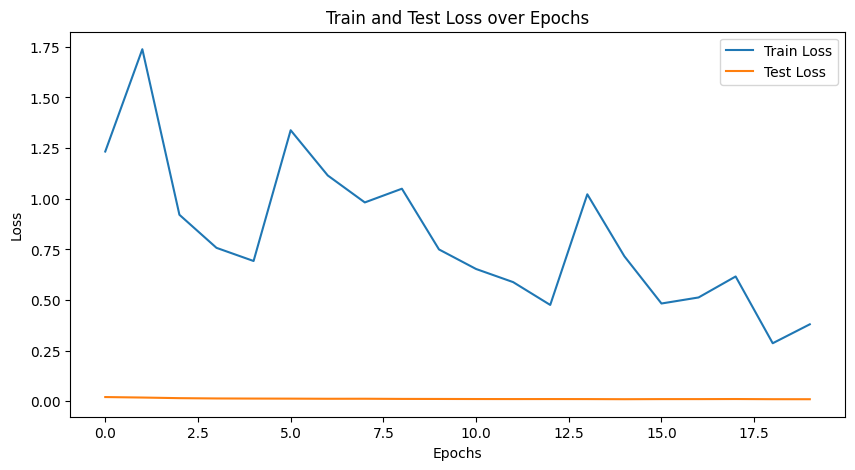

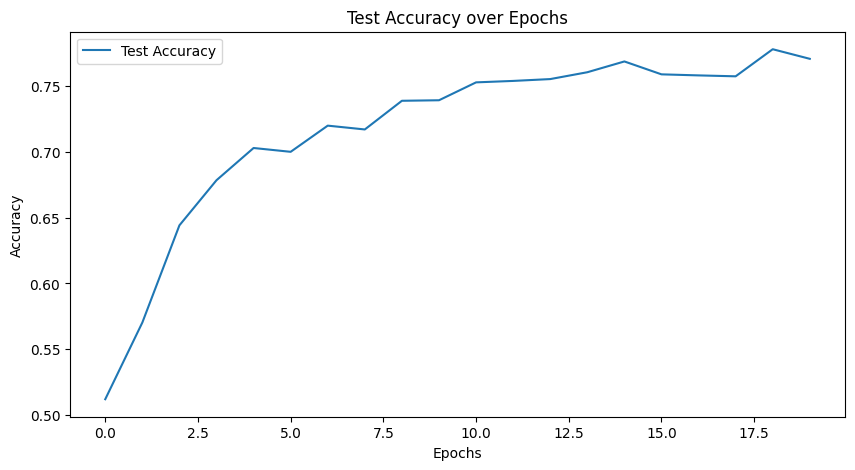

In [7]:
# 绘制训练和测试损失
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss over Epochs')
plt.savefig('train_test_loss_cifar10_cnn.png')

# 绘制测试集准确率
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy over Epochs')
plt.savefig('test_accuracy_cifar10_cnn.png')
plt.show()
